# Jobs in Sydney

This started as a cron job appending scraped lines to a text file to answer the question "there are 9000 jobs on Gumtree (in Sydney) at the moment... is that a lot? a little? I wonder how that number moves."

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import numpy as np

import gumtree_functions
from importlib import reload

In [ ]:
reload(gumtree_functions)

In [2]:
gumtree_functions.gumtreeScrape()

{'time_now': '2022-07-15 07:43:40', 'job_count': '6564'}

In [3]:
existing_spreadsheet = pd.read_csv('sydney_2022_02Feb_24.csv')

existing_spreadsheet['time_now'] = pd.to_datetime(existing_spreadsheet['time_now'], format='%Y-%m-%d %H:%M:%S')
existing_spreadsheet['job_count'] = pd.to_numeric(existing_spreadsheet['job_count'])

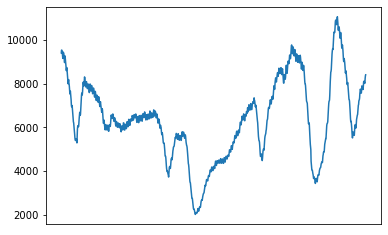

In [4]:
gumtree_functions.fast_plot(existing_spreadsheet)

In [5]:
bucket_of_jsons = gumtree_functions.read_bucket_folder('/Users/fnln/Downloads/bucket')

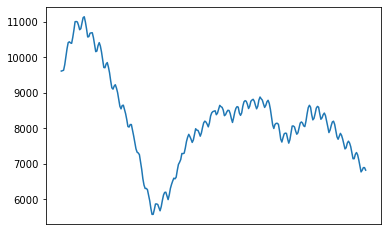

In [6]:
gumtree_functions.fast_plot(bucket_of_jsons)

In [7]:
gumtree_functions.compare_for_stitching(existing_spreadsheet, bucket_of_jsons)

2018-11-05 23:01:01 (beginning, old)
2022-02-24 04:00:42 (end, old)
28949 = n obs

2021-10-15 04:00:44 (beginning, new)
2022-07-08 05:00:42, (end, new)
6383 = n obs

3215 is the number of obs present in the second df that are NOT in the first one.
32164 is expected n_obs in stitched


In [8]:
jul9 = pd.concat([existing_spreadsheet, bucket_of_jsons]).drop_duplicates(keep='first', ignore_index=True)

print(jul9)

                 time_now  job_count
0     2018-11-05 23:01:01       9408
1     2018-11-06 00:01:02       9435
2     2018-11-06 01:01:01       9455
3     2018-11-06 02:01:02       9470
4     2018-11-06 03:01:02       9476
...                   ...        ...
32159 2022-07-08 01:00:42       6643
32160 2022-07-08 02:00:42       6657
32161 2022-07-08 03:00:42       6665
32162 2022-07-08 04:00:42       6670
32163 2022-07-08 05:00:42       6678

[32164 rows x 2 columns]


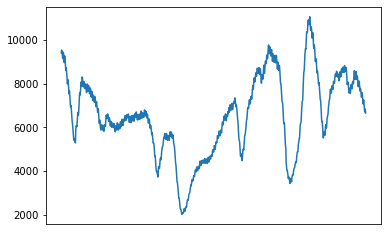

In [9]:
gumtree_functions.fast_plot(jul9)

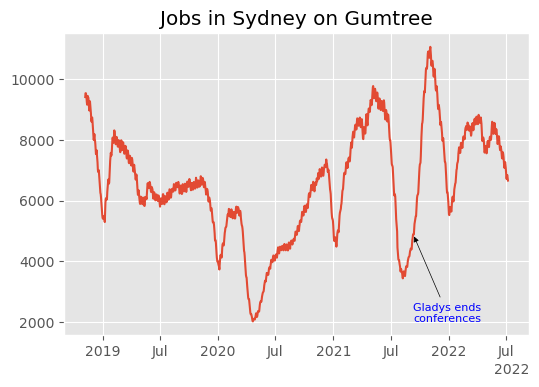

In [10]:
slice_length=24
domain = jul9.iloc[:,0][::slice_length]
image = jul9.iloc[:,1][::slice_length]

# 'seaborn-darkgrid'
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(dpi=100)

    ax.plot(domain, image)
    ax.xaxis.set_major_formatter(
        mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    ax.set_title('Jobs in Sydney on Gumtree')

    ax.annotate('Gladys ends\nconferences', xy=(pd.Timestamp('2021-09-10'), 4900),
    xytext=(pd.Timestamp('2021-09-10'), 2000),
    arrowprops=dict(arrowstyle='-|>', color='k'), c='blue', size=8)

31599


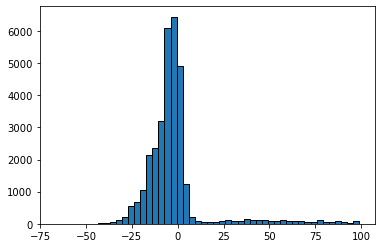

In [11]:
hourly_change = [-i for i in np.diff(jul9.iloc[:,1]) if abs(i) < 100]
print(len(hourly_change))
hist_output = plt.hist(hourly_change, bins=50, edgecolor="k")